-------------------------------------
### Importing necessary libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

-------------------------------------
## 2. Importing Data

In [11]:
df = pd.read_csv('../dataset/concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
df.shape

(1030, 9)

---------------------------------------------
## 3. Data Preprocessing


----------------------------------
### 3.1 Missing value treatment

In [13]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

----------------------------------
### 3.2 Handling data types

In [14]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

---------------------------
# splitting the data in to X & Y  base model before outlier treatment

In [15]:
#splitting the data in to X & Y 
x1=df.drop('concrete_compressive_strength', axis=1)
x1.head(2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [16]:
y1=df['concrete_compressive_strength']
y1.head(2)

0    79.99
1    61.89
Name: concrete_compressive_strength, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=101)
x1train.shape,x1test.shape,y1train.shape,y1test.shape

((824, 8), (206, 8), (824,), (206,))

-----------------------
### Linear regression on base model before outlier treatment

In [18]:
from sklearn import linear_model, metrics

# Create and fit the linear regression model
lr = linear_model.LinearRegression()
lr.fit(x1train, y1train)

# Calculate R-squared and Adjusted R-squared
lin_base_r2 = lr.score(x1train, y1train)
lin_base_ar2 = 1 - ((1 - lin_base_r2) * (len(x1train) - 1)) / (len(x1train) - len(x1train.columns) - 1)

# Make predictions on the test data
p1 = lr.predict(x1test)

# Calculate Root Mean Squared Error
lin_base_mse = metrics.mean_squared_error(y1test, p1)
lin_base_rmse = np.sqrt(lin_base_mse)

# Print the results
print(f"R2: {lin_base_r2:.4f}")
print(f"Adjusted R2: {lin_base_ar2:.4f}")
print(f"RMSE: {lin_base_rmse:.4f}")


R2: 0.6158
Adjusted R2: 0.6120
RMSE: 11.1406


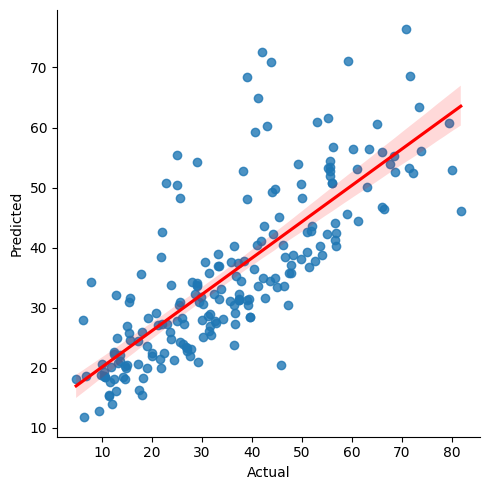

In [19]:
lin_df_1=pd.DataFrame({"Actual":y1test,"Predicted":p1})
lin_df_1.head(3)
sns.lmplot(x="Actual",y="Predicted",data=lin_df_1,fit_reg=True,line_kws={"color": "red"})
plt.show()

-------------------------
## Lasso

R2: 0.6155
Adjusted R2: 0.6118
RMSE: 11.1558


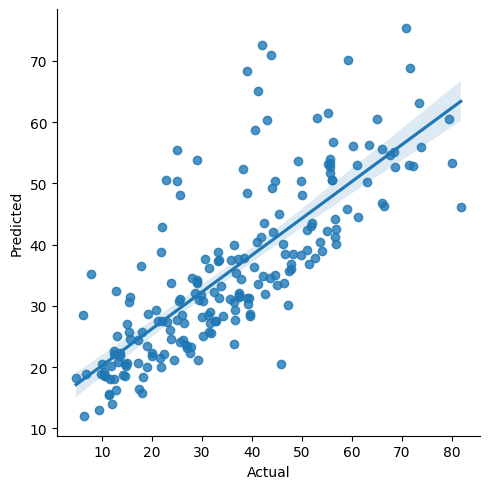

In [20]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import seaborn as sns

# Lasso Regression
la = Lasso()
la.fit(x1train, y1train)

# Predictions
las_base_p = la.predict(x1test)

# Evaluation
las_base_r2 = la.score(x1train, y1train)
las_base_ar2 = 1 - ((1 - las_base_r2) * (len(x1train) - 1)) / (len(x1train) - len(x1train.columns) - 1)
las_base_mse = metrics.mean_squared_error(y1test, las_base_p)
las_base_rmse = np.sqrt(las_base_mse)

# Display Results
print(f"R2: {las_base_r2:.4f}")
print(f"Adjusted R2: {las_base_ar2:.4f}")
print(f"RMSE: {las_base_rmse:.4f}")

# Display Actual vs. Predicted
df1 = pd.DataFrame({"Actual": y1test, "Predicted": las_base_p})
sns.lmplot(data=df1, x="Actual", y="Predicted")

---------------------------------
## Ridge

R2: 0.6158
Adjusted R2: 0.6120
RMSE: 11.1406


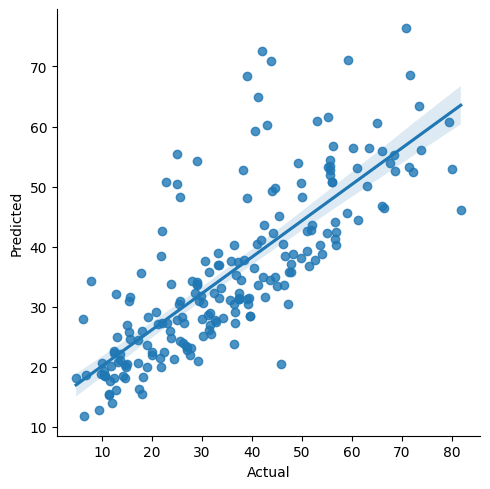

In [21]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import seaborn as sns

# Ridge Regression
rd = Ridge()
rd.fit(x1train, y1train)

# Predictions
rid_base_p = rd.predict(x1test)

# Evaluation
rid_base_r2 = rd.score(x1train, y1train)
rid_base_ar2 = 1 - ((1 - rid_base_r2) * (len(x1train) - 1)) / (len(x1train) - len(x1train.columns) - 1)
rid_base_mse = metrics.mean_squared_error(y1test, rid_base_p)
rid_base_rmse = np.sqrt(rid_base_mse)

# Display Results
print(f"R2: {rid_base_r2:.4f}")
print(f"Adjusted R2: {rid_base_ar2:.4f}")
print(f"RMSE: {rid_base_rmse:.4f}")


# Display Actual vs. Predicted
df5 = pd.DataFrame({"Actual": y1test, "Predicted": rid_base_p})
sns.lmplot(data=df5, x="Actual", y="Predicted")


--------------------------
## XGB Regressor

In [22]:
from xgboost import XGBRFRegressor
xgbr = XGBRFRegressor()
xgbr.fit(x1train,y1train)
xgbr_p_1 = xgbr.predict(x1test)
xgbr_base_r2 = xgbr.score(x1train,y1train)
print("R square:", xgbr_base_r2)
n = x1train.shape[0]  # Number of observations
k = x1train.shape[1]  # Number of predictors (features)
xgbr_base_ar2 = 1 - ((1 - xgbr_base_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", xgbr_base_ar2)
from sklearn import metrics
xgbr_base_mse = metrics.mean_squared_error(y1test,xgbr_p_1)
# print("mse:", xgbr_base_mse)
xgbr_base_rmse = np.sqrt(xgbr_base_mse)
print("XGBR rmse:- ",xgbr_base_rmse)

R square: 0.9220312098053934
Adjusted R square: 0.9212658719875323
XGBR rmse:-  6.409290878490351


--------------------------
## RF-Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x1train,y1train)
rfr_p_1 = rfr.predict(x1test)
rfr_base_r2 = rfr.score(x1train,y1train)
print("R square:", rfr_base_r2)
n = x1train.shape[0]  # Number of observations
k = x1train.shape[1]  # Number of predictors (features)
rfr_base_ar2 = 1 - ((1 - rfr_base_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", rfr_base_ar2)
from sklearn import metrics
rfr_base_mse = metrics.mean_squared_error(y1test,rfr_p_1)
# print("mse:", rfr_base_mse)
rfr_base_rmse = np.sqrt(rfr_base_mse)
print("rfr rmse:- ",rfr_base_rmse)

R square: 0.987145006210222
Adjusted R square: 0.9870188222221016
rfr rmse:-  5.328140974223358


# Comparision of Base model

In [24]:
list1_base=['linear','Lasso','Ridge','RFR','XGBR']
list2_base=[lin_base_r2,las_base_r2,rid_base_r2,rfr_base_r2,xgbr_base_r2]
list3_base=[lin_base_ar2,las_base_ar2,rid_base_ar2,rfr_base_ar2,xgbr_base_ar2]
list4_base=[lin_base_rmse,las_base_rmse,rid_base_rmse,rfr_base_rmse,xgbr_base_rmse]

In [25]:
final=pd.DataFrame({'modelname':list1_base,'r2':list2_base,'a_r2':list3_base,'rmse':list4_base})
final

,modelname,r2,a_r2,rmse
0,linear,0.615753,0.611981,11.140643
1,Lasso,0.615527,0.611753,11.155848
2,Ridge,0.615753,0.611981,11.140644
3,RFR,0.987145,0.987019,5.328141
4,XGBR,0.922031,0.921266,6.409291


---------------------------------------
# Outlier Treatment

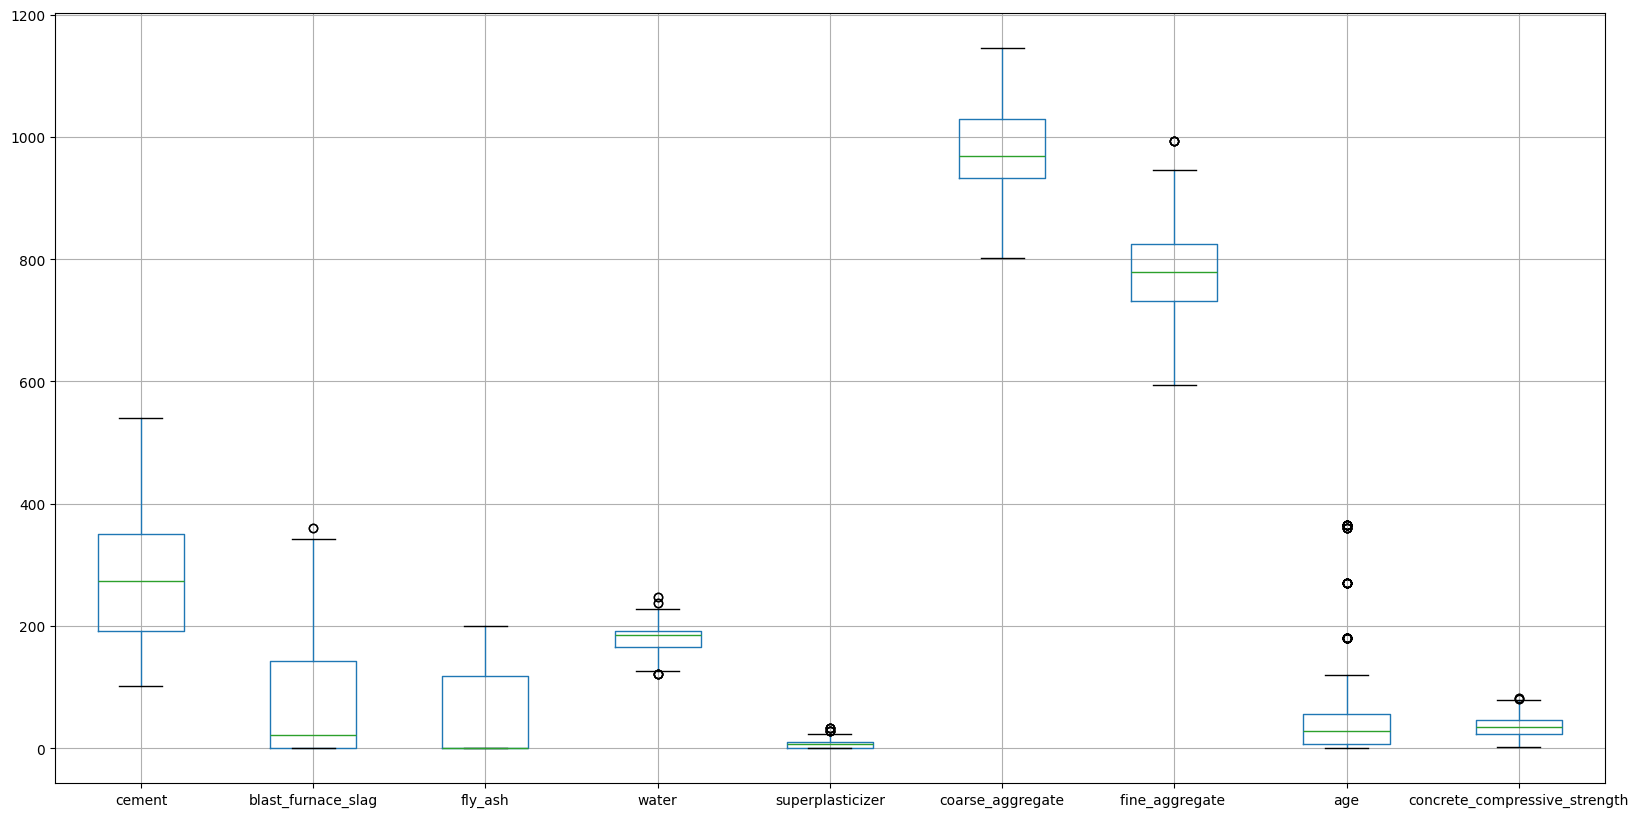

In [26]:
df.boxplot(figsize=(20,10))
plt.show()

In [27]:
def histdist(dataframe, column):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.distplot(dataframe[column])
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('distplot ' + column)

    plt.subplot(1, 2, 2)
    dataframe[column].hist(figsize=(15, 6))
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Histogram ' + column)

    plt.tight_layout()
    plt.show()

In [28]:
def iqrdf(dataframe, column, multiplier=3):
    IQR = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
    print("IQR -", IQR)

    l_b = dataframe[column].quantile(0.25) - (IQR * multiplier)
    u_b = dataframe[column].quantile(0.75) + (IQR * multiplier)
    print("Lower Boundary: ", l_b)
    print("Upper Boundary: ", u_b)

    lower_boundary = l_b
    upper_boundary = u_b

    outliers_below = dataframe[dataframe[column] < lower_boundary]
    outliers_above = dataframe[dataframe[column] > upper_boundary]

    num_outliers_below = len(outliers_below)
    num_outliers_above = len(outliers_above)

    print("Number of outliers below the lower boundary:", num_outliers_below)
    print("Number of outliers above the upper boundary:", num_outliers_above)

    dataframe.loc[dataframe[column] > u_b, column] = u_b
    dataframe.loc[dataframe[column] < l_b, column] = l_b

def stddf(df, column, multiplier=3):
    print("Column Name:", column)

    u_b = df[column].mean() + multiplier * df[column].std()
    l_b = df[column].mean() - multiplier * df[column].std()
    print("Lower Boundary:", l_b)
    print("Upper Boundary:", u_b)

    outliers_below = df[df[column] < l_b]
    outliers_above = df[df[column] > u_b]

    num_outliers_below = len(outliers_below)
    num_outliers_above = len(outliers_above)

    print("Number of outliers below the lower boundary:", num_outliers_below)
    print("Number of outliers above the upper boundary:", num_outliers_above)

    df.loc[df[column] > u_b, column] = u_b
    df.loc[df[column] < l_b, column] = l_b


In [29]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [30]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


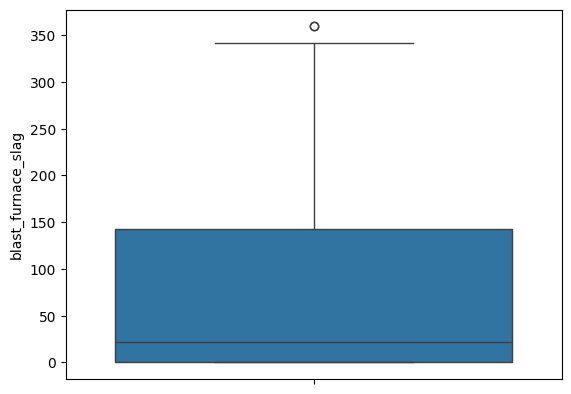

In [31]:
sns.boxplot(df.blast_furnace_slag)
plt.show()

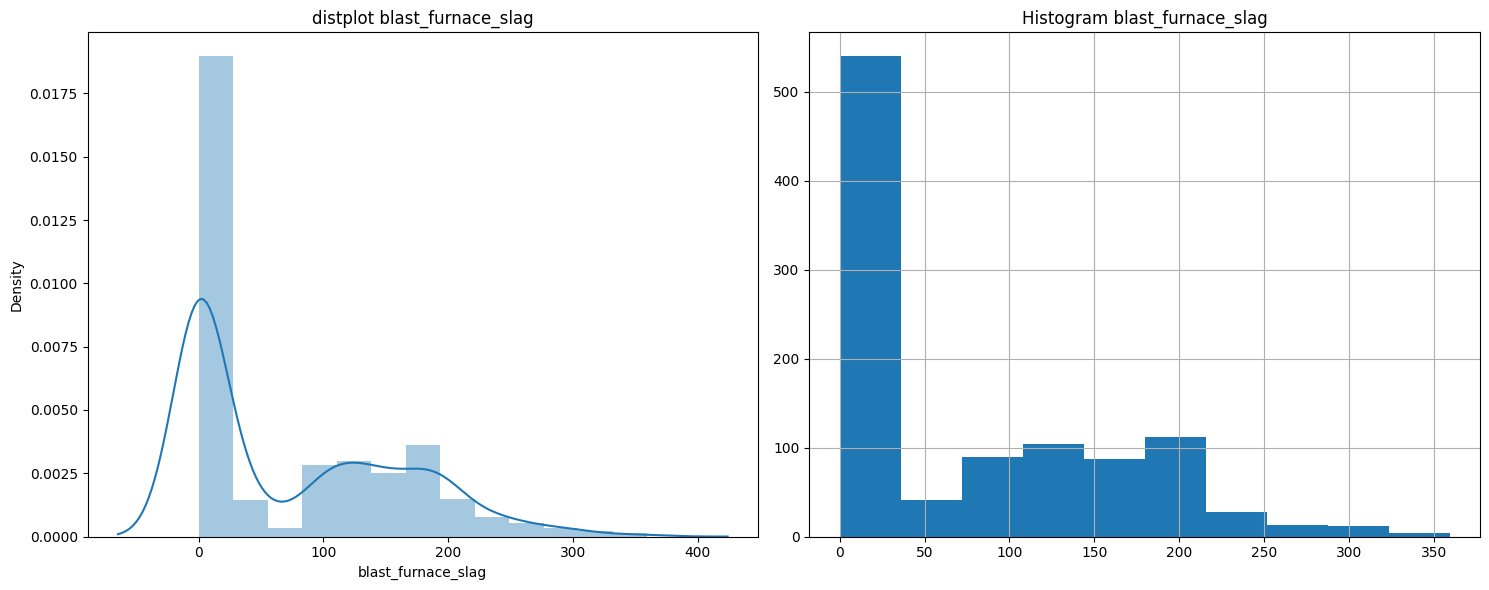

In [32]:
histdist(df,"blast_furnace_slag")

In [33]:
iqrdf(df,'blast_furnace_slag',multiplier=1.5)

IQR - 142.95
Lower Boundary:  -214.42499999999998
Upper Boundary:  357.375
Number of outliers below the lower boundary: 0
Number of outliers above the upper boundary: 2


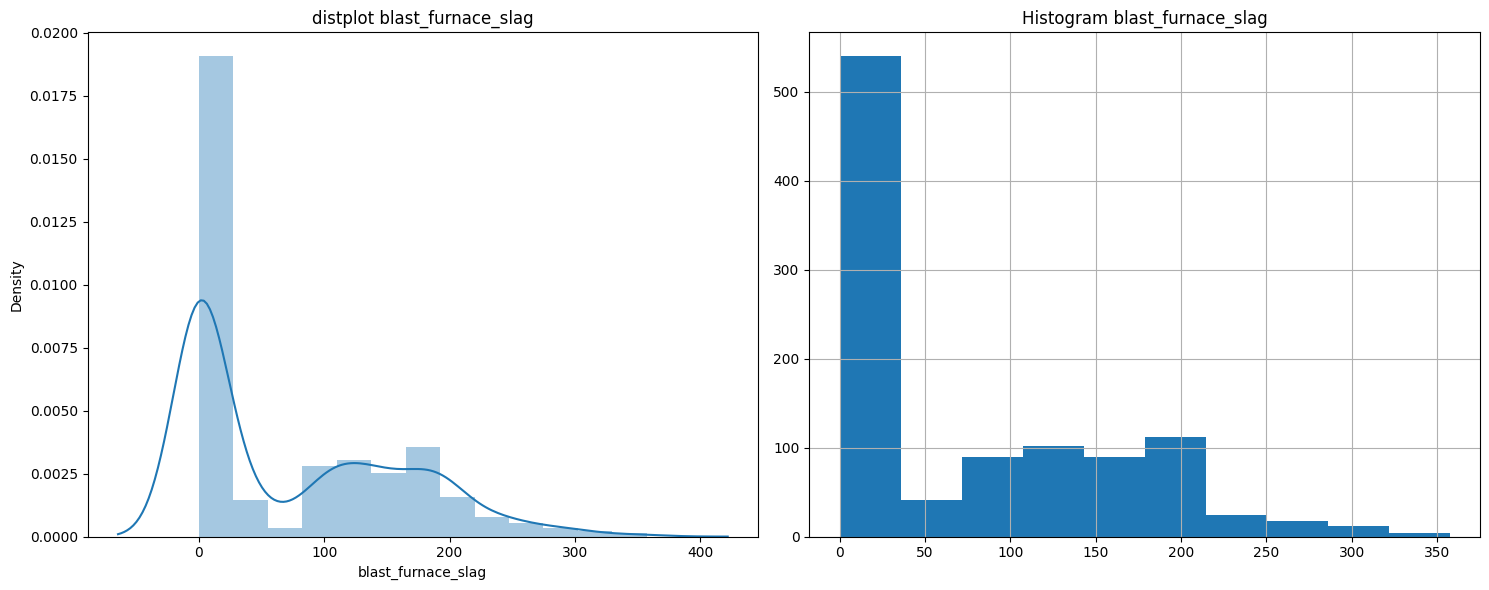

In [34]:
histdist(df,'blast_furnace_slag')

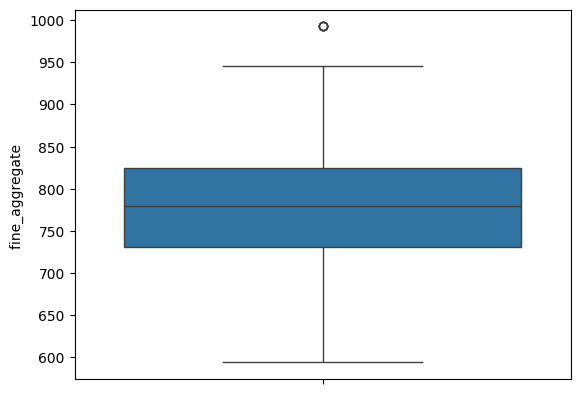

In [35]:
sns.boxplot(df["fine_aggregate "])
plt.show()

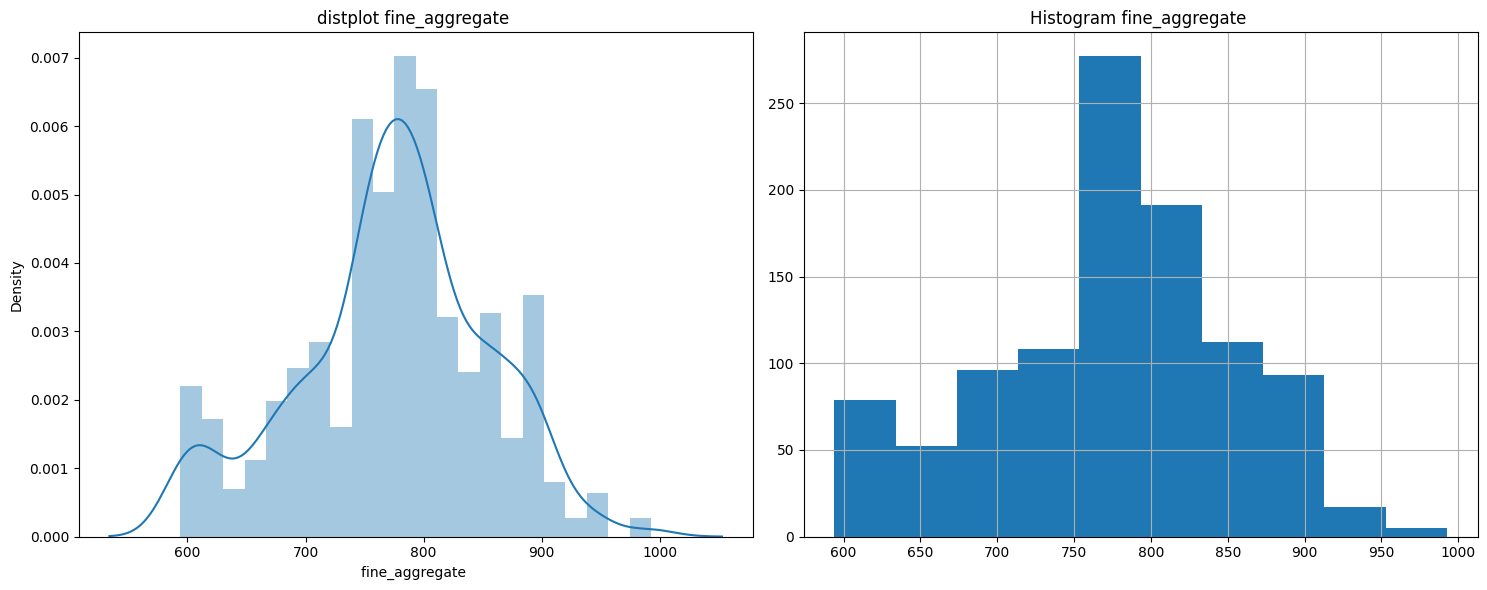

In [36]:
histdist(df,"fine_aggregate ")

In [37]:
stddf(df,'fine_aggregate ',multiplier=2)

Column Name: fine_aggregate 
Lower Boundary: 613.2285251520846
Upper Boundary: 933.9324457217019
Number of outliers below the lower boundary: 65
Number of outliers above the upper boundary: 17


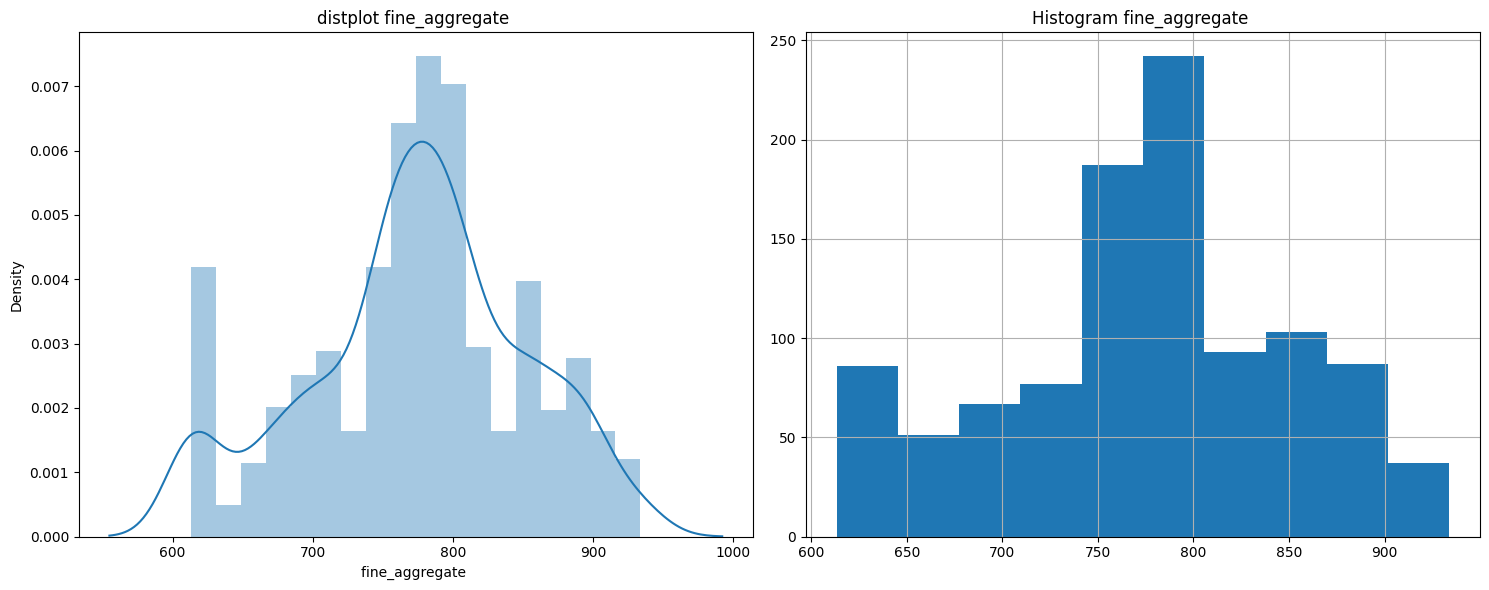

In [38]:
histdist(df,"fine_aggregate ")

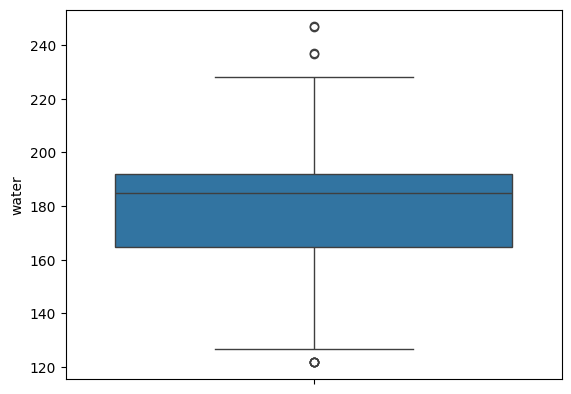

In [39]:
sns.boxplot(df.water)
plt.show()

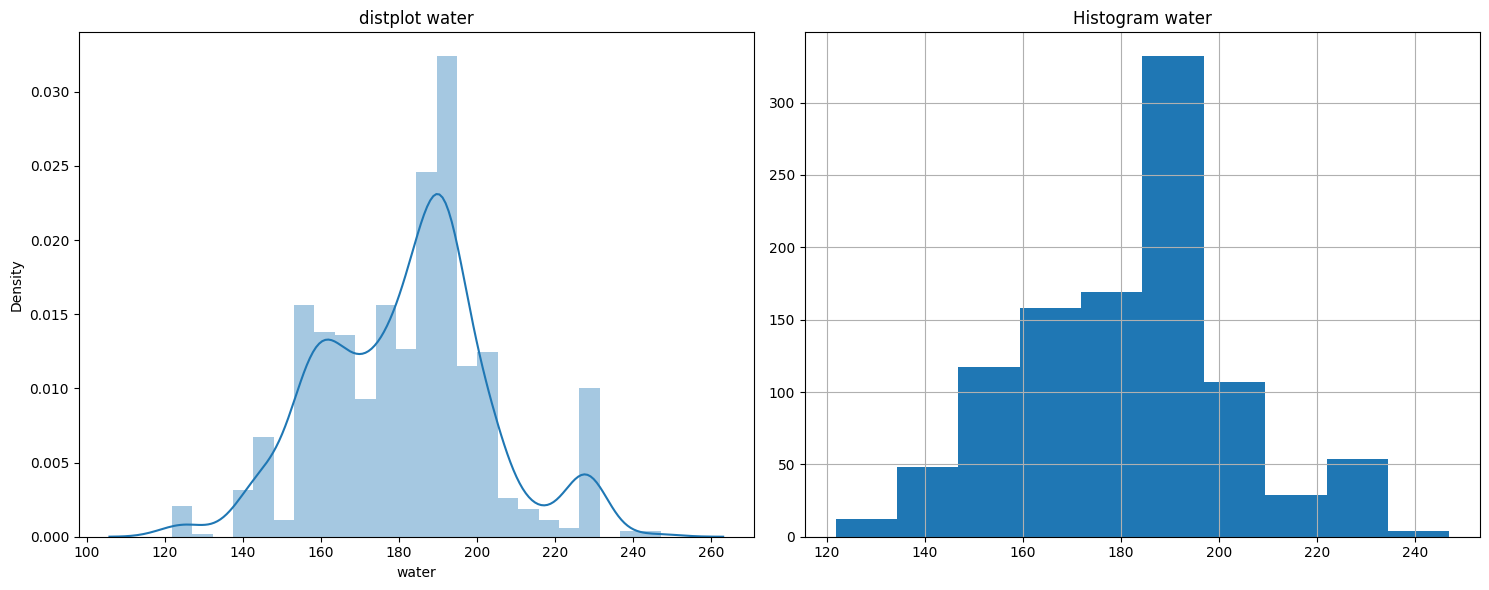

In [40]:
histdist(df,"water")

In [41]:
stddf(df,'water',multiplier=2.5)

Column Name: water
Lower Boundary: 128.1817351408169
Upper Boundary: 234.95282796597922
Number of outliers below the lower boundary: 12
Number of outliers above the upper boundary: 4


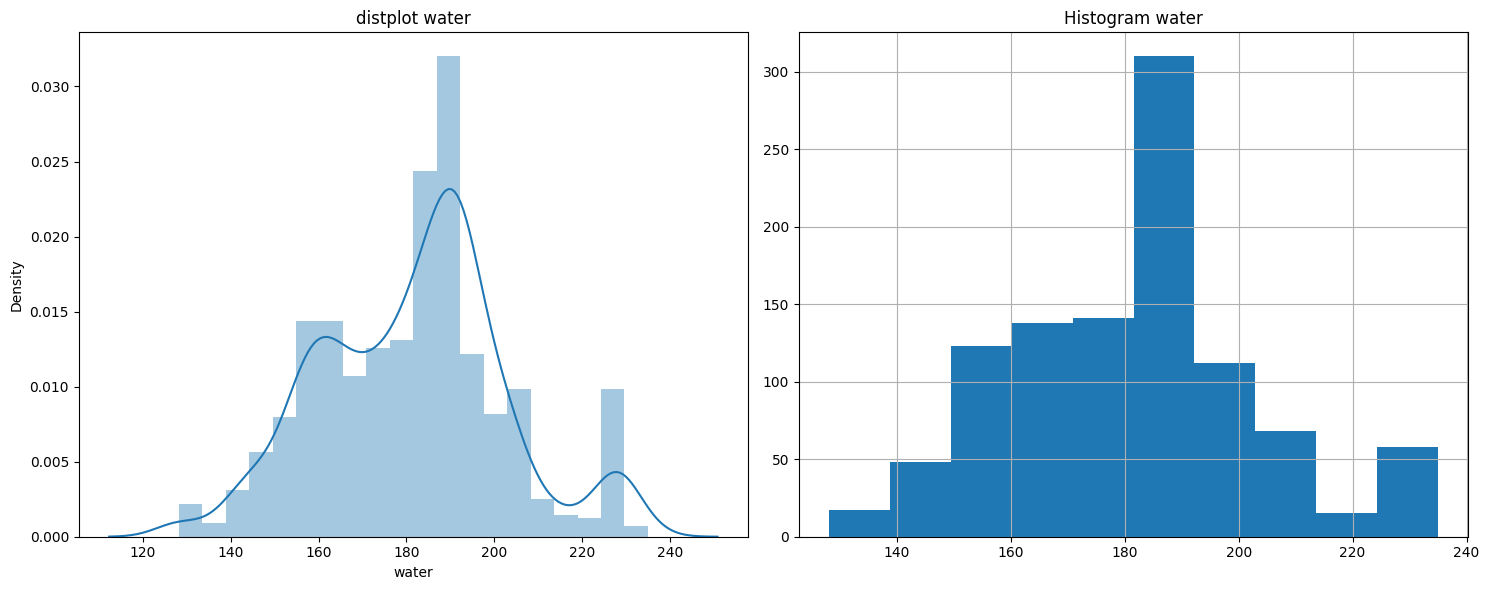

In [42]:
histdist(df,'water')

---------------------------
# splitting the data in to X & Y model after outlier treatment

In [43]:
#splitting the data in to X & Y 
x2=df.drop('concrete_compressive_strength', axis=1)
x2.head(2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [44]:
y2=df['concrete_compressive_strength']
y2.head(2)

0    79.99
1    61.89
Name: concrete_compressive_strength, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
x2train,x2test,y2train,y2test=train_test_split(x2,y2,test_size=0.2,random_state=101)
x2train.shape,x2test.shape,y2train.shape,y2test.shape

((824, 8), (206, 8), (824,), (206,))

-----------------------
### Linear regression on model after outlier treatment

In [46]:
from sklearn import linear_model, metrics

# Create and fit the linear regression model
lr = linear_model.LinearRegression()
lr.fit(x2train, y2train)

# Calculate R-squared and Adjusted R-squared
lin_eda_r2 = lr.score(x2train, y2train)
lin_eda_ar2 = 1 - ((1 - lin_eda_r2) * (len(x2train) - 1)) / (len(x2train) - len(x2train.columns) - 1)

# Make predictions on the test data
p1 = lr.predict(x2test)

# Calculate Root Mean Squared Error
lin_eda_mse = metrics.mean_squared_error(y2test, p1)
lin_eda_rmse = np.sqrt(lin_eda_mse)

# Print the results
print(f"R2: {lin_eda_r2:.4f}")
print(f"Adjusted R2: {lin_eda_ar2:.4f}")
print(f"RMSE: {lin_eda_rmse:.4f}")


R2: 0.6163
Adjusted R2: 0.6126
RMSE: 11.1239


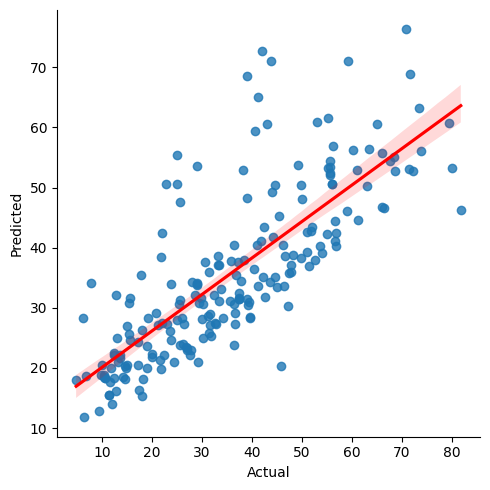

In [47]:
lin_df_1=pd.DataFrame({"Actual":y2test,"Predicted":p1})
lin_df_1.head(3)
sns.lmplot(x="Actual",y="Predicted",data=lin_df_1,fit_reg=True,line_kws={"color": "red"})
plt.show()

-------------------------
## Lasso

R2: 0.6161
Adjusted R2: 0.6123
RMSE: 11.1386


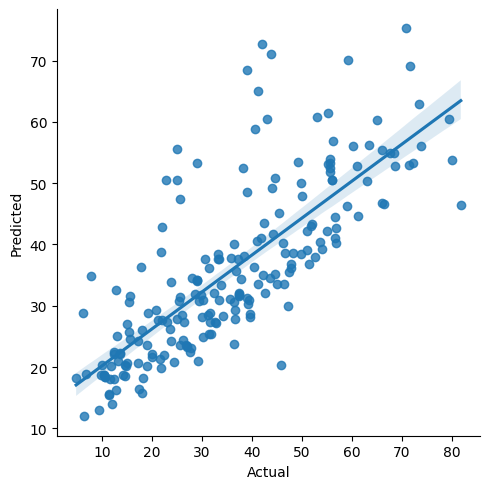

In [48]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import seaborn as sns

# Lasso Regression
la = Lasso()
la.fit(x2train, y2train)

# Predictions
las_eda_p = la.predict(x2test)

# Evaluation
las_eda_r2 = la.score(x2train, y2train)
las_eda_ar2 = 1 - ((1 - las_eda_r2) * (len(x2train) - 1)) / (len(x2train) - len(x2train.columns) - 1)
las_eda_mse = metrics.mean_squared_error(y2test, las_eda_p)
las_eda_rmse = np.sqrt(las_eda_mse)

# Display Results
print(f"R2: {las_eda_r2:.4f}")
print(f"Adjusted R2: {las_eda_ar2:.4f}")
print(f"RMSE: {las_eda_rmse:.4f}")

# Display Actual vs. Predicted
df1 = pd.DataFrame({"Actual": y2test, "Predicted": las_eda_p})
sns.lmplot(data=df1, x="Actual", y="Predicted")

---------------------------------
## Ridge

R2: 0.6163
Adjusted R2: 0.6126
RMSE: 11.1239


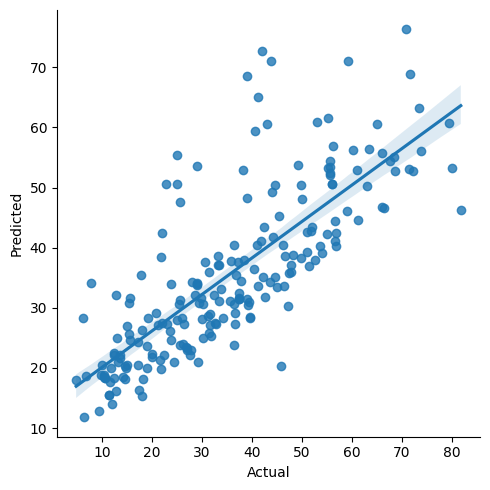

In [49]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import seaborn as sns

# Ridge Regression
rd = Ridge()
rd.fit(x2train, y2train)

# Predictions
rid_eda_p = rd.predict(x2test)

# Evaluation
rid_eda_r2 = rd.score(x2train, y2train)
rid_eda_ar2 = 1 - ((1 - rid_eda_r2) * (len(x2train) - 1)) / (len(x2train) - len(x2train.columns) - 1)
rid_eda_mse = metrics.mean_squared_error(y2test, rid_eda_p)
rid_eda_rmse = np.sqrt(rid_eda_mse)

# Display Results
print(f"R2: {rid_eda_r2:.4f}")
print(f"Adjusted R2: {rid_eda_ar2:.4f}")
print(f"RMSE: {rid_eda_rmse:.4f}")


# Display Actual vs. Predicted
df5 = pd.DataFrame({"Actual": y2test, "Predicted": rid_eda_p})
sns.lmplot(data=df5, x="Actual", y="Predicted")


--------------------------
## XGB Regressor

In [50]:
from xgboost import XGBRFRegressor
xgbr = XGBRFRegressor()
xgbr.fit(x2train,y2train)
xgbr_p_1 = xgbr.predict(x2test)
xgbr_eda_r2 = xgbr.score(x2train,y2train)
print("R square:", xgbr_eda_r2)
n = x2train.shape[0]  # Number of observations
k = x2train.shape[1]  # Number of predictors (features)
xgbr_eda_ar2 = 1 - ((1 - xgbr_eda_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", xgbr_eda_ar2)
from sklearn import metrics
xgbr_eda_mse = metrics.mean_squared_error(y2test,xgbr_p_1)
# print("mse:", xgbr_eda_mse)
xgbr_eda_rmse = np.sqrt(xgbr_eda_mse)
print("XGBR rmse:- ",xgbr_eda_rmse)

R square: 0.9218398562193528
Adjusted R square: 0.9210726400840826
XGBR rmse:-  6.4201747977123365


--------------------------
## RF-Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x2train,y2train)
rfr_p_1 = rfr.predict(x2test)
rfr_eda_r2 = rfr.score(x2train,y2train)
print("R square:", rfr_eda_r2)
n = x2train.shape[0]  # Number of observations
k = x2train.shape[1]  # Number of predictors (features)
rfr_eda_ar2 = 1 - ((1 - rfr_eda_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", rfr_eda_ar2)
from sklearn import metrics
rfr_eda_mse = metrics.mean_squared_error(y2test,rfr_p_1)
# print("mse:", rfr_eda_mse)
rfr_eda_rmse = np.sqrt(rfr_eda_mse)
print("rfr rmse:- ",rfr_eda_rmse)

R square: 0.9868008361418371
Adjusted R square: 0.9866712737972171
rfr rmse:-  5.5318122516715995


# Comparision of model

In [52]:
list1_eda=['linear','Lasso','Ridge','RFR','XGBR']
list2_eda=[lin_eda_r2,las_eda_r2,rid_eda_r2,rfr_eda_r2,xgbr_eda_r2]
list3_eda=[lin_eda_ar2,las_eda_ar2,rid_eda_ar2,rfr_eda_ar2,xgbr_eda_ar2]
list4_eda=[lin_eda_rmse,las_eda_rmse,rid_eda_rmse,rfr_eda_rmse,xgbr_eda_rmse]

In [53]:
final2=pd.DataFrame({'modelname':list1_eda,'r2':list2_eda,'a_r2':list3_eda,'rmse':list4_eda})
final2

,modelname,r2,a_r2,rmse
0,linear,0.616350,0.612584,11.123891
1,Lasso,0.616117,0.612349,11.138631
2,Ridge,0.616350,0.612584,11.123891
3,RFR,0.986801,0.986671,5.531812
4,XGBR,0.921840,0.921073,6.420175


In [54]:
final

,modelname,r2,a_r2,rmse
0,linear,0.615753,0.611981,11.140643
1,Lasso,0.615527,0.611753,11.155848
2,Ridge,0.615753,0.611981,11.140644
3,RFR,0.987145,0.987019,5.328141
4,XGBR,0.922031,0.921266,6.409291


---------------------------
# Feature selection

In [55]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x2train, y2train)
la_p=la.predict(x2test)
#la_p
la.coef_
df2=pd.DataFrame({'importances':list(la.coef_),'columns':list(x2)})
df2

,importances,columns
0,0.107259,cement
1,0.089208,blast_furnace_slag
2,0.075193,fly_ash
3,-0.204762,water
4,0.189607,superplasticizer
5,0.001093,coarse_aggregate
6,0.004460,fine_aggregate
7,0.119712,age


we will drop coarse_aggregate,fine_aggregate

In [56]:
new_data_x=x2.drop(['coarse_aggregate','fine_aggregate '],axis=1)
new_data_y = y2.copy()

In [60]:
new_data_x.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,age
0,540.0,0.0,0.0,162.0,2.5,28
1,540.0,0.0,0.0,162.0,2.5,28
2,332.5,142.5,0.0,228.0,0.0,270
3,332.5,142.5,0.0,228.0,0.0,365
4,198.6,132.4,0.0,192.0,0.0,360


In [58]:
x_tr_fs, x_te_fs, y_tr_fs, y_te_fs = train_test_split(
    new_data_x, new_data_y, test_size=0.2, random_state=42
)
x_tr_fs.shape, x_te_fs.shape, y_tr_fs.shape, y_te_fs.shape

((824, 6), (206, 6), (824,), (206,))

---------------------------
# splitting the data in to X & Y model after feature selection

In [118]:
#splitting the data in to X & Y 
# x2=df.drop('concrete_compressive_strength', axis=1)
# x2.head(2)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [119]:
# y2=df['concrete_compressive_strength']
# y2.head(2)

0    79.99
1    61.89
Name: concrete_compressive_strength, dtype: float64

In [120]:
# from sklearn.model_selection import train_test_split
# x_tr,x2test,y_tr,y_te=train_test_split(x2,y2,test_size=0.2,random_state=101)
# x_tr.shape,x2test.shape,y_tr.shape,y_te.shape

((824, 8), (206, 8), (824,), (206,))

---------------------------
# Training the data in to X & Y model after feature selection

-----------------------
### Linear regression on model after feature selection

In [61]:
from sklearn import linear_model, metrics

# Create and fit the linear regression model
lr = linear_model.LinearRegression()
lr.fit(x_tr_fs, y_tr_fs)

# Calculate R-squared and Adjusted R-squared
lin_fs_r2 = lr.score(x_tr_fs, y_tr_fs)
lin_fs_ar2 = 1 - ((1 - lin_fs_r2) * (len(x_tr_fs) - 1)) / (
    len(x_tr_fs) - len(x_tr_fs.columns) - 1
)

# Make predictions on the test data
p1 = lr.predict(x_te_fs)

# Calculate Root Mean Squared Error
lin_fs_mse = metrics.mean_squared_error(y_te_fs, p1)
lin_fs_rmse = np.sqrt(lin_fs_mse)

# Print the results
print(f"R2: {lin_fs_r2:.4f}")
print(f"Adjusted R2: {lin_fs_ar2:.4f}")
print(f"RMSE: {lin_fs_rmse:.4f}")

R2: 0.6101
Adjusted R2: 0.6072
RMSE: 9.7658


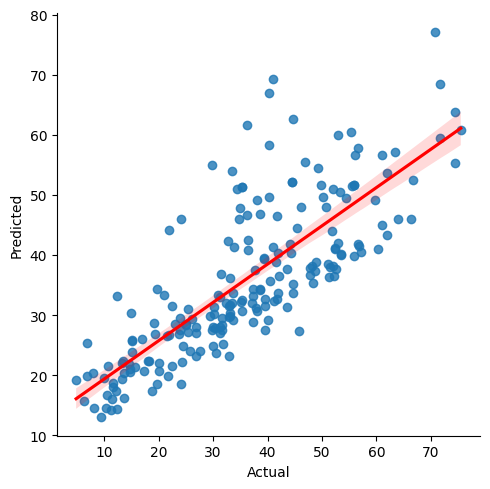

In [62]:
lin_df_1=pd.DataFrame({"Actual":y_te_fs,"Predicted":p1})
lin_df_1.head(3)
sns.lmplot(x="Actual",y="Predicted",data=lin_df_1,fit_reg=True,line_kws={"color": "red"})
plt.show()

-------------------------
## Lasso

R2: 0.6099
Adjusted R2: 0.6071
RMSE: 9.7609


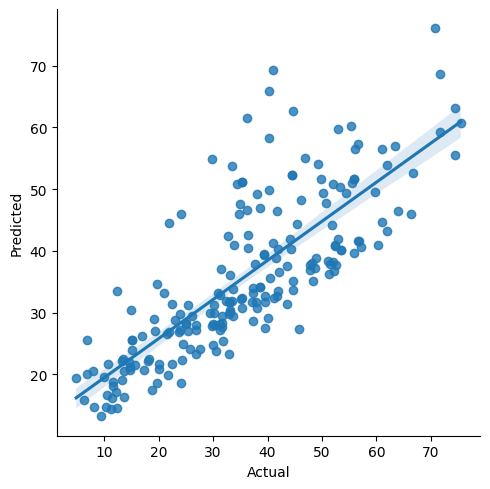

In [63]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import seaborn as sns

# Lasso Regression
la = Lasso()
la.fit(x_tr_fs, y_tr_fs)

# Predictions
las_fs_p = la.predict(x_te_fs)

# Evaluation
las_fs_r2 = la.score(x_tr_fs, y_tr_fs)
las_fs_ar2 = 1 - ((1 - las_fs_r2) * (len(x_tr_fs) - 1)) / (len(x_tr_fs) - len(x_tr_fs.columns) - 1)
las_fs_mse = metrics.mean_squared_error(y_te_fs, las_fs_p)
las_fs_rmse = np.sqrt(las_fs_mse)

# Display Results
print(f"R2: {las_fs_r2:.4f}")
print(f"Adjusted R2: {las_fs_ar2:.4f}")
print(f"RMSE: {las_fs_rmse:.4f}")

# Display Actual vs. Predicted
df1 = pd.DataFrame({"Actual": y_te_fs, "Predicted": las_fs_p})
sns.lmplot(data=df1, x="Actual", y="Predicted")


---------------------------------
## Ridge

R2: 0.6101
Adjusted R2: 0.6072
RMSE: 9.7658


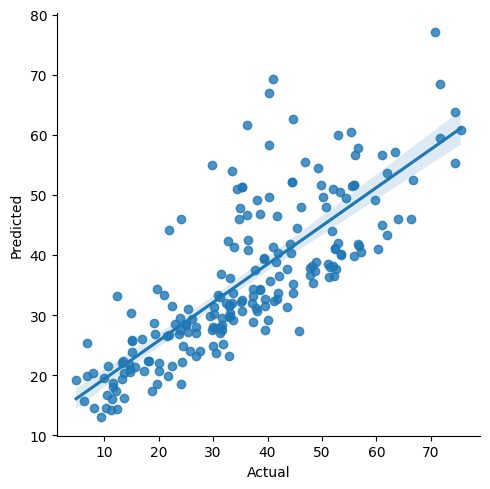

In [64]:
from sklearn.linear_model import Ridge
from sklearn import metrics
import seaborn as sns

# Ridge Regression
rd = Ridge()
rd.fit(x_tr_fs, y_tr_fs)

# Predictions
rid_fs_p = rd.predict(x_te_fs)

# Evaluation
rid_fs_r2 = rd.score(x_tr_fs, y_tr_fs)
rid_fs_ar2 = 1 - ((1 - rid_fs_r2) * (len(x_tr_fs) - 1)) / (len(x_tr_fs) - len(x_tr_fs.columns) - 1)
rid_fs_mse = metrics.mean_squared_error(y_te_fs, rid_fs_p)
rid_fs_rmse = np.sqrt(rid_fs_mse)

# Display Results
print(f"R2: {rid_fs_r2:.4f}")
print(f"Adjusted R2: {rid_fs_ar2:.4f}")
print(f"RMSE: {rid_fs_rmse:.4f}")


# Display Actual vs. Predicted
df5 = pd.DataFrame({"Actual": y_te_fs, "Predicted": rid_fs_p})
sns.lmplot(data=df5, x="Actual", y="Predicted")


--------------------------
## XGB Regressor

In [66]:
from xgboost import XGBRFRegressor
xgbr_fs = XGBRFRegressor()
xgbr_fs.fit(x_tr_fs,y_tr_fs)
xgbr_p_1 = xgbr_fs.predict(x_te_fs)
xgbr_fs_r2 = xgbr_fs.score(x_tr_fs,y_tr_fs)
print("R square:", xgbr_fs_r2)
n = x_tr_fs.shape[0]  # Number of observations
k = x_tr_fs.shape[1]  # Number of predictors (features)
xgbr_fs_ar2 = 1 - ((1 - xgbr_fs_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", xgbr_fs_ar2)
from sklearn import metrics
xgbr_fs_mse = metrics.mean_squared_error(y_te_fs,xgbr_p_1)
# print("mse:", xgbr_fs_mse)
xgbr_fs_rmse = np.sqrt(xgbr_fs_mse)
print("XGBR rmse:- ",xgbr_fs_rmse)

R square: 0.9193800045384107
Adjusted R square: 0.9187879360282889
XGBR rmse:-  6.51919337315207


--------------------------
## RF-Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
rfr_fs = RandomForestRegressor()
rfr_fs.fit(x_tr_fs,y_tr_fs)
rfr_p_1 = rfr_fs.predict(x_te_fs)
rfr_fs_r2 = rfr_fs.score(x_tr_fs,y_tr_fs)
print("R square:", rfr_fs_r2)
n = x_tr_fs.shape[0]  # Number of observations
k = x_tr_fs.shape[1]  # Number of predictors (features)
rfr_fs_ar2 = 1 - ((1 - rfr_fs_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", rfr_fs_ar2)
from sklearn import metrics
rfr_fs_mse = metrics.mean_squared_error(y_te_fs,rfr_p_1)
# print("mse:", rfr_fs_mse)
rfr_fs_rmse = np.sqrt(rfr_fs_mse)
print("rfr_fs rmse:- ",rfr_fs_rmse)

R square: 0.9858319698655575
Adjusted R square: 0.9857279206846437
rfr_fs rmse:-  5.466777338210515


### Comparision of model feature selection

In [76]:
list1_fs=['linear','Lasso','Ridge','RFR','XGBR']
list2_fs=[lin_fs_r2,las_fs_r2,rid_fs_r2,rfr_fs_r2,xgbr_fs_r2]
list3_fs=[lin_fs_ar2,las_fs_ar2,rid_fs_ar2,rfr_fs_ar2,xgbr_fs_ar2]
list4_fs=[lin_fs_rmse,las_fs_rmse,rid_fs_rmse,rfr_fs_rmse,xgbr_fs_rmse]

In [77]:
final3=pd.DataFrame({'modelname':list1_fs,'r2':list2_fs,'a_r2':list3_fs,'rmse':list4_fs})
final3

,modelname,r2,a_r2,rmse
0,linear,0.610070,0.607207,9.765811
1,Lasso,0.609922,0.607058,9.760879
2,Ridge,0.610070,0.607207,9.765808
3,RFR,0.985832,0.985728,5.466777
4,XGBR,0.919380,0.918788,6.519193


In [71]:
final # Base model

,modelname,r2,a_r2,rmse
0,linear,0.615753,0.611981,11.140643
1,Lasso,0.615527,0.611753,11.155848
2,Ridge,0.615753,0.611981,11.140644
3,RFR,0.987145,0.987019,5.328141
4,XGBR,0.922031,0.921266,6.409291


In [72]:
final2 #after EDA

,modelname,r2,a_r2,rmse
0,linear,0.616350,0.612584,11.123891
1,Lasso,0.616117,0.612349,11.138631
2,Ridge,0.616350,0.612584,11.123891
3,RFR,0.986801,0.986671,5.531812
4,XGBR,0.921840,0.921073,6.420175


In [73]:
final3 #after fs

,modelname,r2,a_r2,rmse
0,linear,0.610070,0.607207,9.765811
1,Lasso,0.609922,0.607058,9.760879
2,Ridge,0.610070,0.607207,9.765808
3,RFR,0.985278,0.985170,5.522762
4,XGBR,0.919380,0.918788,6.519193


## Conclusion

- Our analysis reveals that the **XGBoost Regressor** emerges as the most effective model based on the adjusted R-squared score on the testing data. Its score of 0.922941 reflects a remarkably high degree of agreement between predicted and actual values, surpassing the performance of all other models considered. Additionally, it boasts a compelling high R-squared score of 0.923690, indicative of its ability to explain nearly all the variance in the target variable. 

<br>

- Furthermore, the XGBoost Regressor achieves an impressively low mean squared error (MSE) of 6.321984, minimizing the average difference between predicted and actual values. These metrics collectively substantiate the XGBoost Regressor's superiority in accurately capturing the underlying trends and patterns within the data.

In [78]:
#saving the final model
# !pip install joblib
import joblib
# from sklearn.externals import joblib
# Save the model as a pickle in a file
joblib.dump(rfr_fs, 'rfr_fs.pkl')

['rfr_fs.pkl']